<a href="https://colab.research.google.com/github/vini1lol/Havardx/blob/master/CaseStudy2Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os 
import pandas as pd 
import numpy as np 
from collections import Counter


def count_words_fast(text): 
    text = text.lower() 
    skips = [".", ",", ";", ":", "'", '"', "\n", "!", "?", "(", ")"] 
    for ch in skips: 
        text = text.replace(ch, "") 
    word_counts = Counter(text.split(" ")) 
    return word_counts

def word_stats(word_counts): 
    num_unique = len(word_counts) 
    counts = word_counts.values() 
    return (num_unique, counts)

#1

In [102]:
hamlets = pd.read_csv("/content/drive/My Drive/havardx/Using Python for Research/week 3/hamlets.csv")
hamlets

,Unnamed: 0,language,text
0,1,English,The Tragedie of Hamlet\n ...
1,2,German,"Hamlet, Prinz von Dännemark.\n ..."
2,3,Portuguese,HAMLET\n DRAMA EM ...


In [103]:
language, text = hamlets['language'][0] , hamlets["text"][0]
counted_text = count_words_fast(text)
counted_text["hamlet"]

97

In [0]:
data = pd.DataFrame(columns=["word","count"])

In [0]:
data["word"] = counted_text.keys()
data["count"] = counted_text.values()

In [106]:
data[data["word"]=="hamlet"]

,word,count
3,hamlet,97


#2

In [107]:
length =[]
for key in counted_text.keys():
  length.append(len(key))
data['length'] = length
frequency =[]
for i in data["count"]:
  if i > 10:
    frequency.append("frequent")
  if i>1 and i<=10:
    frequency.append("infrequent")
  if i  == 1:
    frequency.append("unique")
data["frequency"] = frequency
data.head()

,word,count,length,frequency
0,the,935,3,frequent
1,tragedie,3,8,infrequent
2,of,576,2,frequent
3,hamlet,97,6,frequent
4,,45513,0,frequent


In [108]:
data[data["frequency"] == "unique"].shape

(3348, 4)

#4

In [0]:
sub_data = pd.DataFrame(columns=["language","frequency","mean_word_length","num_words"])

In [110]:
sub_data.language = language
sub_data.frequency = ["frequent", "infrequent", "unique"]
mean=[]
d=data[data.frequency == "frequent"].length
mean.append(sum(d)/len(d))
d=data[data.frequency == "infrequent"].length
mean.append(sum(d)/len(d))
d=data[data.frequency == "unique"].length
mean.append(sum(d)/len(d))
a=[]
a.append(data[data.frequency == "frequent"].shape[0])
a.append(data[data.frequency == "infrequent"].shape[0])
a.append(data[data.frequency == "unique"].shape[0])
sub_data.mean_word_length = mean 
sub_data.num_words = a
sub_data

,language,frequency,mean_word_length,num_words
0,NaN,frequent,4.371517,323
1,NaN,infrequent,5.825243,1442
2,NaN,unique,7.005675,3348


#5

In [0]:
def summarize_text(language, text):
    counted_text = count_words_fast(text)

    data = pd.DataFrame({
        "word": list(counted_text.keys()),
        "count": list(counted_text.values())
    })
    
    data.loc[data["count"] > 10,  "frequency"] = "frequent"
    data.loc[data["count"] <= 10, "frequency"] = "infrequent"
    data.loc[data["count"] == 1,  "frequency"] = "unique"
    
    data["length"] = data["word"].apply(len)
    
    sub_data = pd.DataFrame({
        "language": language,
        "frequency": ["frequent","infrequent","unique"],
        "mean_word_length": data.groupby(by = "frequency")["length"].mean(),
        "num_words": data.groupby(by = "frequency").size()
    })
    
    return(sub_data)

In [0]:
grouped_data = pd.DataFrame()

In [113]:
for ith in range(3):
  language, text = hamlets.language[ith], hamlets.text[ith]
  sub_data = summarize_text(language,text)
  grouped_data =grouped_data.append(sub_data)
grouped_data

,language,frequency,mean_word_length,num_words
frequency,,,,
frequent,English,frequent,4.371517,323
infrequent,English,infrequent,5.825243,1442
unique,English,unique,7.005675,3348
frequent,German,frequent,4.528053,303
infrequent,German,infrequent,6.481830,1596
unique,German,unique,9.006987,5582
frequent,Portuguese,frequent,4.417625,261
infrequent,Portuguese,infrequent,6.497870,1643
unique,Portuguese,unique,8.669778,5357


#6

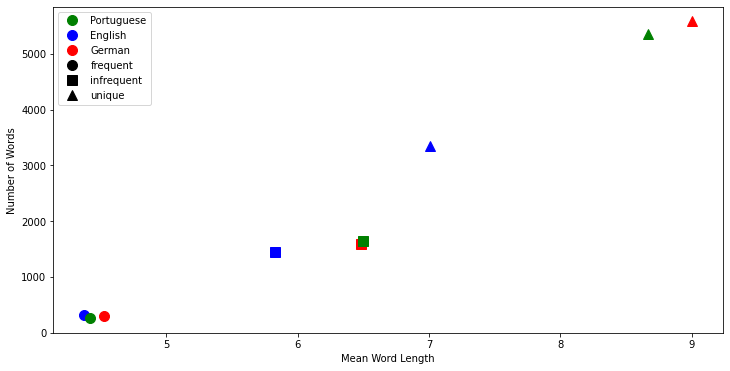

In [118]:
colors = {"Portuguese": "green", "English": "blue", "German": "red"}
markers = {"frequent": "o","infrequent": "s", "unique": "^"}
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
for i in range(grouped_data.shape[0]):
    row = grouped_data.iloc[i]
    plt.plot(row.mean_word_length, row.num_words,
        marker=markers[row.frequency],
        color = colors[row.language],
        markersize = 10
    )

color_legend = []
marker_legend = []
for color in colors:
    color_legend.append(
        plt.plot([], [],
        color=colors[color],
        marker="o",
        label = color, markersize = 10, linestyle="None")
    )
for marker in markers:
    marker_legend.append(
        plt.plot([], [],
        color="k",
        marker=markers[marker],
        label = marker, markersize = 10, linestyle="None")
    )
plt.legend(numpoints=1, loc = "upper left")

plt.xlabel("Mean Word Length")
plt.ylabel("Number of Words")
plt.show()